# **Data Resampling**
As explained in our <u>***data-visualisation.csv***</u> resampling is required for the merged200k.csv dataset in order to balance out the distribution of track popularity.

#### **Import Necessary Libraries**

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

---

In [2]:
df = pd.read_csv('datasets/merged200k.csv')
df

,Track Name,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Track Popularity,Artist Genres,track_id
0,act ii: date @ 8 (feat. Drake) - remix,0.550,0.545,0.0,-9.304,1.0,0.1630,0.3180,0.000000,0.0608,0.412,102.469,4.0,87,NaN,3QS9ZCtoSCJhmaJ7QNXSAS
1,LEAP!,0.892,0.585,11.0,-7.269,1.0,0.1020,0.1460,0.000004,0.0881,0.244,104.011,4.0,38,NaN,3vl2uH4D2QItFFhzz5L06g
2,Overdrive,0.568,0.788,5.0,-6.280,1.0,0.0377,0.0101,0.000000,0.1410,0.460,104.959,4.0,66,"bedroom pop, pop, pov: indie",3QyoC6OvQUmpQwQZ18iaTs
3,Raise y_our glass,0.567,0.503,8.0,-6.119,1.0,0.1240,0.5810,0.000000,0.3690,0.184,72.798,4.0,60,NaN,7j1vFohEm1lbsctYY9gyGd
4,In My Mind,0.668,0.392,2.0,-12.178,0.0,0.0585,0.7890,0.002750,0.3450,0.323,135.936,3.0,73,gen z singer-songwriter,2W779g2UrRZtVdf3FcEOO1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191390,Quickly (feat. Brandy),0.736,0.701,A#,-4.345,Minor,0.1000,0.2310,0.000000,0.2030,0.770,99.991,4/4,39,Soul,1U0OMWvR89Cm20vCNar50f
191391,P.O.P.,0.802,0.516,D,-9.014,Major,0.2130,0.1040,0.000485,0.1050,0.482,175.666,4/4,43,Soul,2gGqKJWfWbToha2YmDxnnj
191392,I'll Take Care Of You - Single Version,0.423,0.337,A#,-13.092,Minor,0.0436,0.5660,0.000000,0.2760,0.497,80.023,4/4,32,Soul,2iZf3EUedz9MPqbAvXdpdA
191393,Burning Fire,0.785,0.683,E,-6.944,Minor,0.0337,0.0329,0.000880,0.2370,0.969,113.830,4/4,38,Soul,1qWZdkBl4UVPj9lK6HuuFM


As explained in our "data-visualisation.ipynb" notebook, there is a possible limitation where Spotify does not update a song's track popularity, and thus assignes a value of 0 by default. Unfortunately, we will have to remove these tracks.

In [4]:
# Remove songs with popularity of 0
df.drop(df.loc[df['Track Popularity']==0].index, inplace=True)
df.shape

(180881, 16)

## **Section 1: Regression Sampling Methods**

#### <u>**Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise (SMOGN)**</u>

In [5]:
predictors = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
              "Instrumentalness", "Liveness", "Valence", "Tempo"]
track_pop= pd.DataFrame(df['Track Popularity'])   # Response
voice_analysis = pd.DataFrame(df[predictors]) # Predictor

# Split the Dataset into Train and Test
or_X_train, or_X_test, or_y_train, or_y_test = train_test_split(voice_analysis, track_pop, test_size = 0.30, random_state=100)

In [6]:
# Let's save the original training dataset and test dataset separately
# So that we can use the same test dataset to test the model trained with SMOGN dataset
regression_training = pd.concat([or_X_train, or_y_train], axis=1, join = "inner")
regression_test = pd.concat([or_X_test, or_y_test], axis=1, join = "inner")

In [7]:
# Reset the indexing
regression_training = regression_training.reset_index(drop=True)
regression_test = regression_test.reset_index(drop=True)

In [8]:
# Check if the indexing is corrected and our dataset is good
regression_training.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity
0,0.596,0.574,-11.148,0.0281,0.00129,0.191000,0.1150,0.3970,132.001,54
1,0.559,0.675,-13.257,0.7280,0.69000,0.000000,0.6980,0.8080,86.717,10
2,0.161,0.296,-17.388,0.0381,0.70900,0.917000,0.1110,0.0795,109.055,27
3,0.573,0.510,-7.637,0.0352,0.73900,0.000118,0.0768,0.4580,76.494,37
4,0.648,0.808,-7.098,0.0420,0.02080,0.000005,0.0829,0.5040,143.972,56


In [9]:
# Check the number of data points for training dataset
regression_training.shape

(126616, 10)

In [10]:
# Check the number of data points for test dataset
regression_test.shape

(54265, 10)

To apply SMOGN sampling, we must find the correct rel_coeff parameter. As such, hyperparameter optimising technique is employed. GridSearchCV is chosen as it performs an exhaustive search over the specified parameter grid. This means that if the best parameters lie within the grid, GridSearchCV will find them. 

GridSearchCV will pick 10 values, equally spaced between 0.7 and 0.95. It will then return the rel_coeff value with the highest R^2 value after fitting a linear regression model. 0.7 is chosen as the lower bound as any value below 0.8 would be too computationally expensive (i.e. would take around 5 hours to sample the entire dataset).

We use a sampled dataset to feed inside GridSearchCV to speed up the searching process.

In [11]:
regression_training_sampled = regression_training.sample(n=10000, random_state=42, ignore_index=True, )
regression_test_sampled = regression_test.sample(n=2500, random_state=42, ignore_index=True)

In [12]:
regression_test_sampled.shape

(2500, 10)

In [13]:
regression_training_sampled.shape

(10000, 10)

In [14]:
import smogn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import mean_squared_error

# Make a function to apply SMOGN sampling with rel_coeff as a parameter
def apply_smogn(rel_coeff):
    df_smogn = smogn.smoter(
        ## main arguments
        data = regression_training_sampled,         ## pandas dataframe
        y = 'Track Popularity',   ## string ('header name')
        k = 9,                    ## positive integer (k < n)
        samp_method = 'balance',  ## string ('balance' or 'extreme')

        ## phi relevance arguments
        rel_thres = 1,         ## fixed at 1 to keep it computationally feasible
        rel_method = 'auto',      ## string ('auto' or 'manual')
        rel_xtrm_type = 'high',   ## string ('low' or 'both' or 'high')
        rel_coef = rel_coeff         ## positive real number (0 < R)
    )
    return df_smogn.drop('Track Popularity', axis=1), df_smogn['Track Popularity']

# Define the custom model class
class SMOGNRandomLinearRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, rel_coeff=0.5, **kwargs):
        self.rel_coeff = rel_coeff
        self.model = LinearRegression(**kwargs)
    
    def fit(self, X, y):
        print(self.rel_coeff)
        X_res, y_res = apply_smogn(self.rel_coeff)
        self.model.fit(X_res, y_res)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Specify the distribution for the rel_coeff parameter to be tried out
param_distributions = {
    'rel_coeff': np.linspace(0.7, 0.95, 10)
}

# Make an instance of the custom model
custom_model = SMOGNRandomLinearRegressor() 

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=custom_model, param_grid=param_distributions, scoring='r2', cv=2)

# Fit grid search
grid_search.fit(regression_test_sampled[predictors], regression_test_sampled["Track Popularity"]) 

# Print the best parameters and the score associated with it
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)  # Negative score because we use negative MSE (lower MSE is better)

0.7


dist_matrix:   1%|          | 6/609 [00:00<00:24, 24.35it/s]

r_index: 100%|##########| 127/127 [00:00<00:00, 2707.50it/s]


0.7


r_index: 100%|##########| 127/127 [00:00<00:00, 2874.86it/s]


0.7277777777777777


r_index: 100%|##########| 113/113 [00:00<00:00, 2857.21it/s]


0.7277777777777777


r_index: 100%|##########| 113/113 [00:00<00:00, 2822.33it/s]


0.7555555555555555


r_index: 100%|##########| 113/113 [00:00<00:00, 2863.87it/s]


0.7555555555555555


r_index: 100%|##########| 113/113 [00:00<00:00, 1531.95it/s]


0.7833333333333333


r_index: 100%|##########| 250/250 [00:00<00:00, 2729.41it/s]


0.7833333333333333


r_index: 100%|##########| 250/250 [00:00<00:00, 2611.48it/s]


0.8111111111111111


r_index: 100%|##########| 250/250 [00:00<00:00, 2785.74it/s]


0.8111111111111111


r_index: 100%|##########| 250/250 [00:00<00:00, 2370.00it/s]


0.8388888888888888


r_index: 100%|##########| 127/127 [00:00<00:00, 1934.17it/s]


0.8388888888888888


r_index: 100%|##########| 127/127 [00:00<00:00, 1404.20it/s]


0.8666666666666666


r_index: 100%|##########| 151/151 [00:00<00:00, 2790.72it/s]


0.8666666666666666


r_index: 100%|##########| 151/151 [00:00<00:00, 2738.39it/s]


0.8944444444444444


r_index: 100%|##########| 151/151 [00:00<00:00, 2777.88it/s]


0.8944444444444444


r_index: 100%|##########| 151/151 [00:00<00:00, 2817.91it/s]


0.9222222222222222


r_index: 100%|##########| 95/95 [00:00<00:00, 2887.99it/s]


0.9222222222222222


r_index: 100%|##########| 95/95 [00:00<00:00, 2809.99it/s]


0.95


r_index: 100%|##########| 95/95 [00:00<00:00, 2900.50it/s]


0.95


r_index: 100%|##########| 95/95 [00:00<00:00, 2797.50it/s]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
2 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/var/folders/fz/fh5c1mt952s8gfzlg27lyp9c0000gn/T/ipykernel_64960/2041005503.py", line 32, in fit
    X_res, y_res = apply_smogn(self.rel_coeff)
                   ^^^^^^^^

0.7


r_index: 100%|##########| 127/127 [00:00<00:00, 2524.01it/s]

Best Parameters: {'rel_coeff': 0.7}
Best Score: -0.23580156367063565


In [15]:
"""
DO NOT RUN THIS CELL. SKIP THIS CELL.
This cell generates the smogn.csv file but takes almost an hour to run.
"""

# # Oversample the training dataset using SMOGN
# df_smogn = smogn.smoter(
    
#     ## main arguments (same as above)
#     data = regression_training, 
#     y = 'Track Popularity',   
#     k = 9,                   
#     samp_method = 'balance',  

#     ## phi relevance arguments
#     rel_thres = 1,     
#     rel_method = 'auto',    
#     rel_xtrm_type = 'high', 
#     rel_coef = grid_search.best_params_['rel_coeff']  # Using the best parameter from the GridSearchCV
# )

# # Save to csv
# df_smogn.to_csv("datasets/smogn.csv")

dist_matrix:   0%|          | 0/6337 [00:00<?, ?it/s]

r_index: 100%|##########| 6275/6275 [00:02<00:00, 2793.79it/s]


In [16]:
# Import from csv so you don't have to run the code above
df_smogn = pd.read_csv("datasets/smogn.csv")

In [17]:
# Delete data points with track popularity greater than 100 or lower than 0
# As popularity score is between 0 and 100
df_smogn = df_smogn[df_smogn['Track Popularity'] <= 100]
df_smogn = df_smogn[df_smogn['Track Popularity'] >= 0]

In [18]:
df_smogn.to_csv("datasets/smogn.csv")
regression_training.to_csv("datasets/regression_training.csv")
regression_test.to_csv("datasets/regression_test.csv")

## **Visualisation of Resampled Data as a Regression Problem**

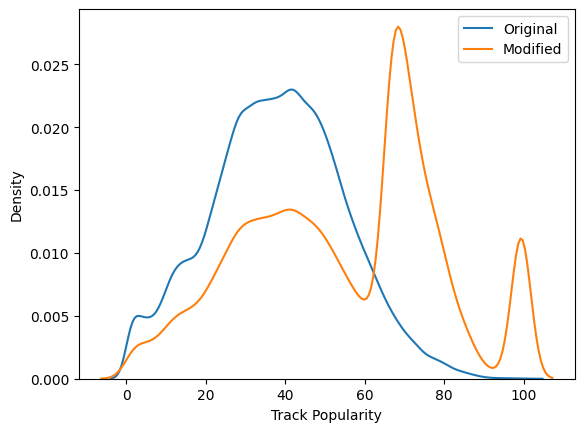

In [19]:
## Compare track popularity distribution before and after sampling using SMOGN
sb.kdeplot(regression_training['Track Popularity'], label = "Original")
sb.kdeplot(df_smogn['Track Popularity'], label = "Modified")
plt.legend()
plt.show()

#### **Conclusion**

SMOGN <u>over-sampled "minority" observations</u> and <u>under-sampled "majority" observations</u> in a continuous response variable according to the box plot. In this case, the minority are Spotify tracks with high popularity (of around 60-80), and the majority are Spotify tracks with low popularity (of around 0-60).

As such, the modified SMOGN dataset increases the amount of tracks with high popularity and decreases the amount of tracks with low popularity, as seen in the above kde plot.

Overall, there will be a more even number of data points with high popularity and low popularity, which allows regression models to be less biased towards predicting not-popular songs.

---

## **Section 2: Classification Sampling Methods**

### **Converting Regression Problem into Classification Problem**
We decided to convert the regression problem into a classification problem as well to determine which can produce a better score.
> Track Popularity scores >50 were taken to be popular songs, while scores ≤50 are taken to be not-popular.

In [20]:
threshold = 50
df['Track Popularity Cat'] = df['Track Popularity'].apply(lambda x: 1 if x > threshold else 0)

# Let's rename this dataframe as df_classification
df_classification = df

In [21]:
df_classification.head()

,Track Name,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Track Popularity,Artist Genres,track_id,Track Popularity Cat
0,act ii: date @ 8 (feat. Drake) - remix,0.550,0.545,0.0,-9.304,1.0,0.1630,0.3180,0.000000,0.0608,0.412,102.469,4.0,87,NaN,3QS9ZCtoSCJhmaJ7QNXSAS,1
1,LEAP!,0.892,0.585,11.0,-7.269,1.0,0.1020,0.1460,0.000004,0.0881,0.244,104.011,4.0,38,NaN,3vl2uH4D2QItFFhzz5L06g,0
2,Overdrive,0.568,0.788,5.0,-6.280,1.0,0.0377,0.0101,0.000000,0.1410,0.460,104.959,4.0,66,"bedroom pop, pop, pov: indie",3QyoC6OvQUmpQwQZ18iaTs,1
3,Raise y_our glass,0.567,0.503,8.0,-6.119,1.0,0.1240,0.5810,0.000000,0.3690,0.184,72.798,4.0,60,NaN,7j1vFohEm1lbsctYY9gyGd,1
4,In My Mind,0.668,0.392,2.0,-12.178,0.0,0.0585,0.7890,0.002750,0.3450,0.323,135.936,3.0,73,gen z singer-songwriter,2W779g2UrRZtVdf3FcEOO1,1


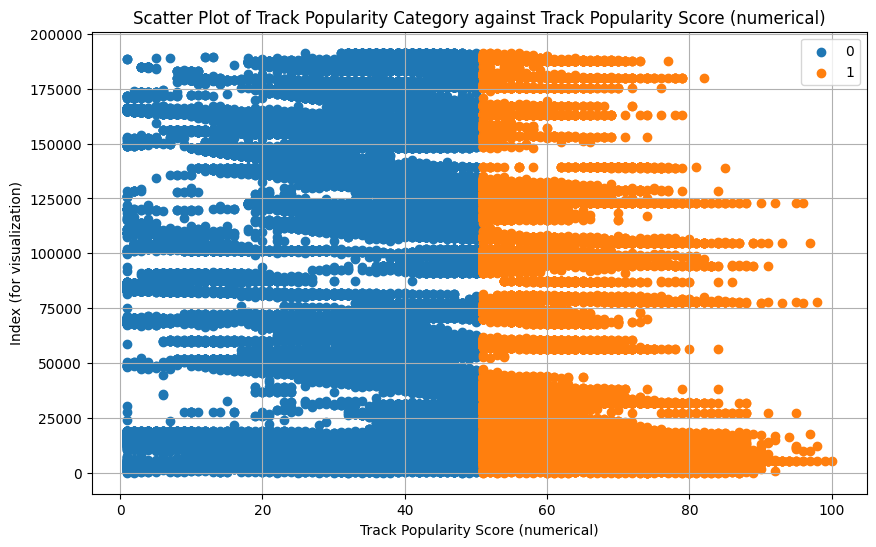

In [22]:
# Plot to show that map between Track Popularity and Track Popularity Cat is successful
plt.figure(figsize=(10, 6))
for popularity in [0, 1]:
    subset = df_classification[df_classification['Track Popularity Cat'] == popularity]
    plt.scatter(subset['Track Popularity'], subset.index, label=popularity)

plt.title('Scatter Plot of Track Popularity Category against Track Popularity Score (numerical)')
plt.xlabel('Track Popularity Score (numerical)')
plt.ylabel('Index (for visualization)')
plt.legend()
plt.grid(True)
plt.show()

From the plot, songs with track popularity score of below 50 is given track popularity cat of 1 (corresponding to 'not popular') while songs with track popularity score above 50 is given track popularity cat of 2 (corresponding to 'popular').

In [23]:
# Export converted classification problem to csv file
df_classification.to_csv("datasets/merged200k_classification.csv")

In [24]:
print("Distribution of popular and not-popular tracks in original dataset")
df_classification['Track Popularity Cat'].value_counts(normalize = True)

Distribution of popular and not-popular tracks in original dataset


Track Popularity Cat
0    0.768693
1    0.231307
Name: proportion, dtype: float64

There are significantly more not-popular tracks as compared to popular tracks (78% vs 22%). As such, the models trained on the original dataset will struggle with predicting popular songs as compared to not-popular songs. 

Let's try to balance out the ratio between not-popular and popular tracks using various sampling methods aimed for classification.

In [25]:
# Form training data
predictors = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
              "Instrumentalness", "Liveness", "Valence", "Tempo"]
track_pop_cat= pd.DataFrame(df_classification['Track Popularity Cat'])   # Response
voice_analysis = pd.DataFrame(df_classification[predictors]) # Predictor

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(voice_analysis, track_pop_cat, test_size = 0.25, random_state=10)

In [26]:
# Let's save the original training dataset and test dataset separately
# So that we can use the same test dataset to test each sampled dataset
classification_training = pd.concat([X_train, y_train], axis=1, join = "inner")
classification_test = pd.concat([X_test, y_test], axis=1, join = "inner")

In [27]:
# Reset the indexing
classification_training = classification_training.reset_index(drop=True)
classification_test = classification_test.reset_index(drop=True)

In [28]:
# Check the dataset
classification_training.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity Cat
0,0.649,0.506,-8.581,0.0286,0.64100,0.004500,0.308,0.577,134.488,0
1,0.763,0.810,-5.118,0.0861,0.03110,0.000000,0.316,0.437,108.004,0
2,0.377,0.165,-16.337,0.0381,0.98400,0.761000,0.107,0.540,134.589,0
3,0.434,0.328,-9.952,0.0492,0.69000,0.000012,0.948,0.297,114.988,0
4,0.500,0.800,-7.904,0.0465,0.00596,0.826000,0.261,0.102,110.015,0


In [29]:
# Export the classification datasets into csv files
classification_training.to_csv("datasets/classification_training.csv")
classification_test.to_csv("datasets/classification_test.csv")

### <u>**Random Over Sampling**</u>

In [30]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=101)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)

# Check the number of records after over sampling
print("Not-popular vs popular tracks in the training dataset")
print(y_train_ros.value_counts()[0], ':', y_train_ros.value_counts()[1])

Not-popular vs popular tracks in the training dataset
104224 : 104224


In [31]:
rdmover = pd.concat([X_train_ros, y_train_ros], axis=1)
rdmover.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity Cat
0,0.649,0.506,-8.581,0.0286,0.64100,0.004500,0.308,0.577,134.488,0
1,0.763,0.810,-5.118,0.0861,0.03110,0.000000,0.316,0.437,108.004,0
2,0.377,0.165,-16.337,0.0381,0.98400,0.761000,0.107,0.540,134.589,0
3,0.434,0.328,-9.952,0.0492,0.69000,0.000012,0.948,0.297,114.988,0
4,0.500,0.800,-7.904,0.0465,0.00596,0.826000,0.261,0.102,110.015,0


In [32]:
# Write random oversampling dataframe to a CSV file
rdmover.to_csv('datasets/rdmover.csv')

### <u>**Synthetic Minority Oversampling Technique (SMOTE)**</u>

In [33]:
from imblearn.over_sampling import SMOTE

# Randomly over sample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)

# Check the number of records after over sampling
print("Not-popular vs popular tracks in the training dataset")
print(y_train_smote.value_counts()[0], ':', y_train_smote.value_counts()[1])

Not-popular vs popular tracks in the training dataset
104224 : 104224


In [34]:
smotedf = pd.concat([X_train_smote, y_train_smote], axis=1)
smotedf.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity Cat
0,0.649,0.506,-8.581,0.0286,0.64100,0.004500,0.308,0.577,134.488,0
1,0.763,0.810,-5.118,0.0861,0.03110,0.000000,0.316,0.437,108.004,0
2,0.377,0.165,-16.337,0.0381,0.98400,0.761000,0.107,0.540,134.589,0
3,0.434,0.328,-9.952,0.0492,0.69000,0.000012,0.948,0.297,114.988,0
4,0.500,0.800,-7.904,0.0465,0.00596,0.826000,0.261,0.102,110.015,0


In [35]:
# Write SMOTE dataframe to a CSV file
smotedf.to_csv('datasets/smote.csv')

### <u>**Random Under Sampling**</u>

In [36]:
from imblearn.under_sampling import RandomUnderSampler

# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=101)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

# Check the number of records after under sampling
print("Not-popular vs popular tracks in the training dataset")
print(y_train_rus.value_counts()[0], ':', y_train_rus.value_counts()[1])

Not-popular vs popular tracks in the training dataset
31436 : 31436


In [37]:
rdmunder = pd.concat([X_train_rus, y_train_rus], axis=1)
rdmunder.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity Cat
61758,0.655,0.459,-6.168,0.2770,0.1420,0.000000,0.1000,0.8970,203.364,0
49966,0.343,0.419,-11.321,0.0304,0.6140,0.900000,0.1270,0.0921,89.945,0
137869,0.716,0.949,-3.038,0.1540,0.0712,0.000085,0.3500,0.7290,122.961,0
158675,0.611,0.864,-5.328,0.1740,0.0381,0.017900,0.2600,0.7400,139.189,0
178156,0.555,0.813,-8.137,0.2240,0.9440,0.946000,0.0823,0.5640,193.663,0


In [38]:
# Write random undersampling dataframe to a CSV file
rdmunder.to_csv('datasets/rdmunder.csv')

### <u>**NearMiss**</u>

In [39]:
from imblearn.under_sampling import NearMiss

# Under sample the majority class
nearmiss = NearMiss(version=3)
X_train_nearmiss, y_train_nearmiss= nearmiss.fit_resample(X_train, y_train)

# Check the number of records after over sampling
print("Not-popular vs popular tracks in the training dataset")
print(y_train_nearmiss.value_counts()[0], ':', y_train_nearmiss.value_counts()[1])

Not-popular vs popular tracks in the training dataset
31436 : 31436


In [40]:
nm = pd.concat([X_train_nearmiss, y_train_nearmiss], axis=1)
nm.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity Cat
0,0.332,0.4230,-12.102,0.0384,0.261,0.000140,0.0716,0.5190,236.799,0
1,0.397,0.2860,-15.948,0.4470,0.984,0.000046,0.1060,0.0656,230.512,0
2,0.357,0.1290,-10.855,0.0854,0.980,0.000004,0.0975,0.1910,232.602,0
3,0.220,0.1020,-22.205,0.0430,0.869,0.965000,0.1030,0.0337,33.593,0
4,0.160,0.0744,-22.592,0.0408,0.933,0.761000,0.0785,0.0761,35.341,0


In [41]:
# Write NearMiss sampled dataframe to a CSV file
nm.to_csv('datasets/nearmiss.csv')

---

## **Visualisation of Resampled Data as a Classification Problem**

Text(0.5, 0, 'NearMiss')

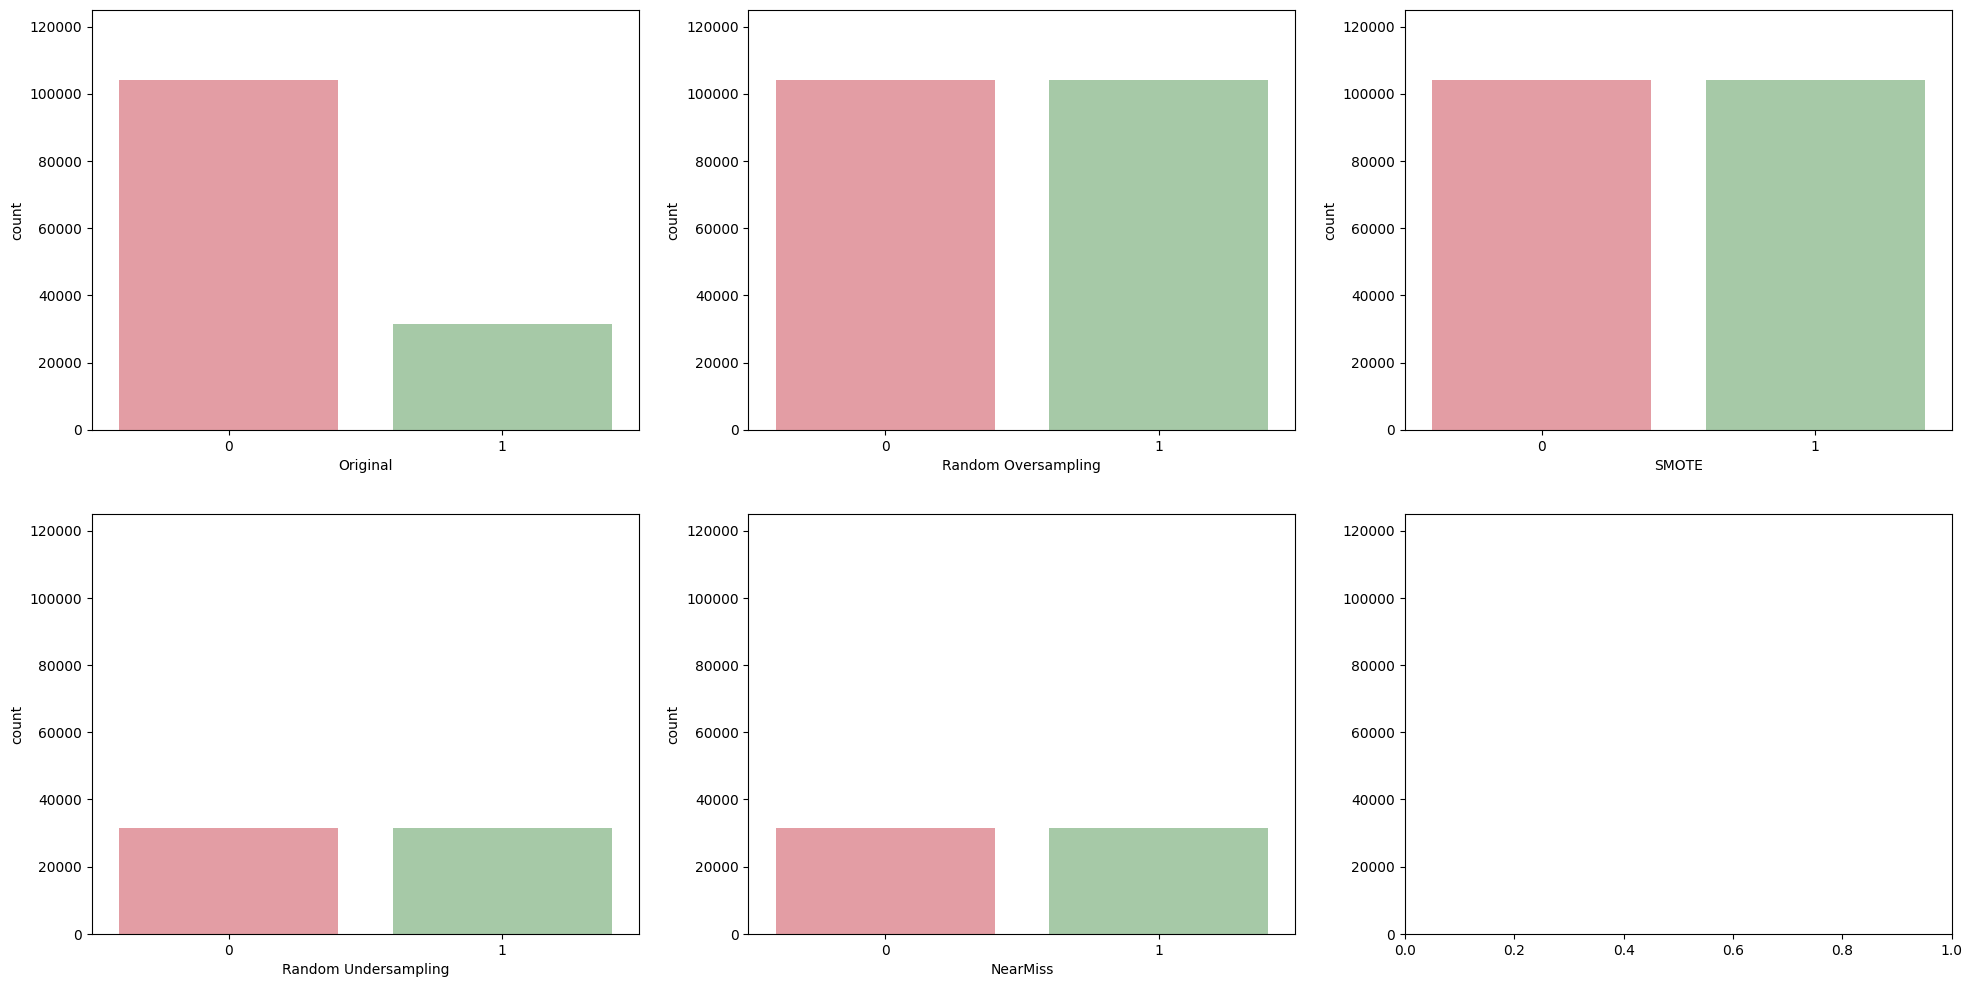

In [42]:
"""
classification_training : Original dataset as a classification problem
rdmover : Random Oversampling
smotedf : SMOTE
rdmunder : Random Undersampling
nm : NearMiss
"""

f, axes = plt.subplots(2,3, figsize=(24,12))
plt.setp(axes,ylim=(0,125000))

o = sb.countplot(x=classification_training['Track Popularity Cat'], hue=classification_training['Track Popularity Cat'],
                 ax=axes[0,0], palette=['#EF919B',"#A0CFA2"], legend=False)
o.set_xlabel("Original")
ro = sb.countplot(x=rdmover['Track Popularity Cat'], hue=rdmover['Track Popularity Cat'],
                  ax=axes[0,1], palette=['#EF919B',"#A0CFA2"], legend=False)
ro.set_xlabel("Random Oversampling")
sm = sb.countplot(x=smotedf['Track Popularity Cat'], hue=smotedf['Track Popularity Cat'],
                  ax=axes[0,2], palette=['#EF919B',"#A0CFA2"], legend=False)
sm.set_xlabel("SMOTE")
ru = sb.countplot(x=rdmunder['Track Popularity Cat'], hue=rdmunder['Track Popularity Cat'],
                  ax=axes[1,0], palette=['#EF919B',"#A0CFA2"], legend=False)
ru.set_xlabel("Random Undersampling")
n = sb.countplot(x=nm['Track Popularity Cat'], hue=nm['Track Popularity Cat'],
                 ax=axes[1,1], palette=['#EF919B',"#A0CFA2"], legend=False)
n.set_xlabel("NearMiss")

Overall, there is a more even number of data points with high popularity and low popularity for all of the resampled data

---

# **References**
1. https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/
2. https://medium.com/@manjindersingh_10145/sampling-methods-for-imbalanced-classification-along-with-python-code-fa1832b5aaca
3. https://github.com/nickkunz/smogn
4. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV